## ML ZoomCamp 2024 - Machine Learning for Regression

 <p>This project is about creation of a model for helping users to predict car prices.The dataset was obtained from <a href="https://www.kaggle.com/datasets/CooperUnion/cardataset">from this dataset</a></p>

### Project plan:
<ul>
    <li>Prepare data and Exploratory Data Analysis(EDA)</li>
    <li>Use linear regression for predicting price</li>
    <li>Understanding the internals of linear regression</li>
    <li>Evaluating the model with RMSE</li>
    <li>Feature engineering</li>
    <li>Regularization</li>
    <li>Using the model</li>
</ul>

### Data preparation - Car price prediction

#### Loading data and get an overview

In [3]:
#import libraries
import pandas as pd
import numpy as np

In [5]:
#reading csv file
df = pd.read_csv('data.csv')

In [6]:
#getting first overview after downloading
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df['Transmission Type']

0           MANUAL
1           MANUAL
2           MANUAL
3           MANUAL
4           MANUAL
           ...    
11909    AUTOMATIC
11910    AUTOMATIC
11911    AUTOMATIC
11912    AUTOMATIC
11913    AUTOMATIC
Name: Transmission Type, Length: 11914, dtype: object

In [8]:
df.Transmission Type

SyntaxError: invalid syntax (2384802771.py, line 1)

In [9]:
#what we can see here , there is some inconsistency in the way of naming columns
# sometimes the columns have underscores , sometimes not,sometimes the columns have capital letters, sometimes not

#df['Transformation Type'] is working
#df.Transformation Type is not working beacause of space

### Cleaning 

<p>To make the columns more consistent we might decide to make them all lowercased and we might replace spaces with underscores.</p>
<p>The following code snippets show how to get this.</p>

In [1]:
# Pandas DataFrame has a field called columns, 
# that contains the name of the columns
# columns is an index, that is a special data structure 
# in Pandas (very similar to series)
df.columns

NameError: name 'df' is not defined

In [10]:
# like series it also has the str method for doing string 
# manipulation what we can do now is to apply the same 
# string function to all column names
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


##### Actually we have the same problems with the values. Before we can apply that, we need to detect all string columns, 
##### because the str function works only on strings.

In [11]:
df.dtypes


make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [12]:
# to select only the object
df.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

##### The output of the last line of code in the last snippet are the values and the index of the series.
##### We’re not interested in values here, but we’re interested in the names.


In [13]:
# Get access to the index of that series 
# Converting it to a python list with name strings
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

##### Similar to what we’ve done with the column names we want to apply to the specified columns.

In [14]:
df['make'].str.lower().str.replace(' ','_')
 
# Better way
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')
 
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### EDA

#### Getting an overview

In [15]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [16]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("number of unique values: ", df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
number of unique values:  48

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-class

#### Distribution of price

##### Visualize of price column 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [21]:
#Display the plots in notebook
%matplotlib inline

C:\Users\Admin-IT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

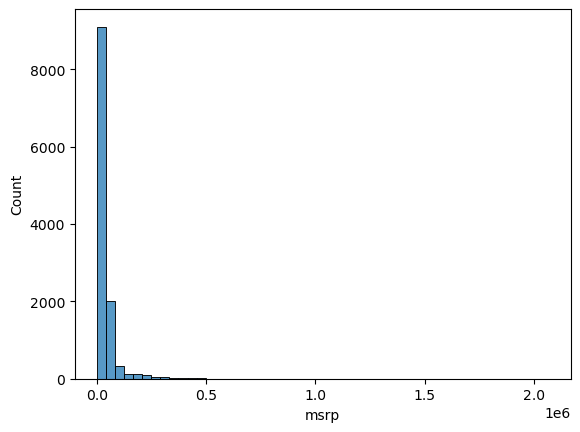

In [23]:
#bins : number of bars in the histogram
#in the diagram 1e6 means 10^6  = 1000000
sns.histplot(df.msrp, bins=50)

C:\Users\Admin-IT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

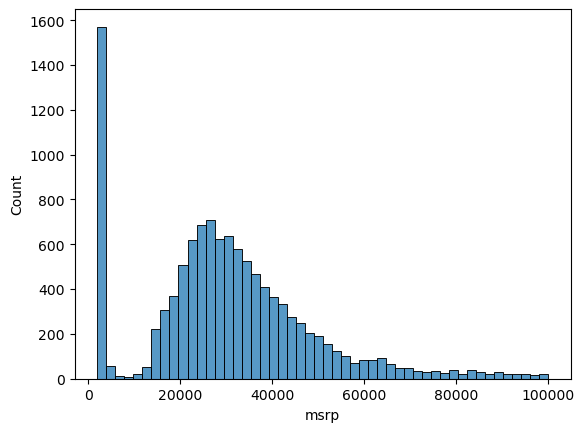

In [25]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

C:\Users\Admin-IT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

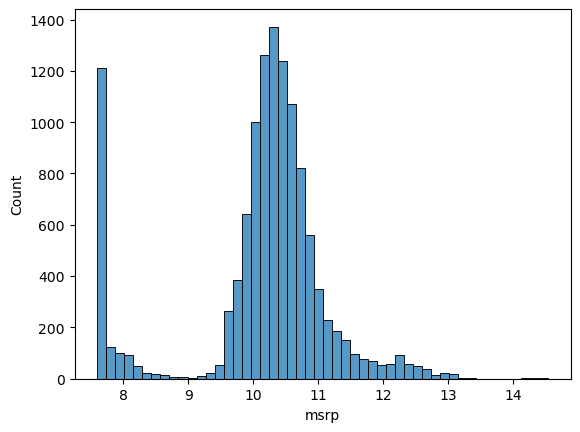

In [26]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

#### Missing values

In [27]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting up the validation framework

In [28]:
#returns the number of records of the whole dataset
len(df)

11914

In [30]:
#calculate 20% of the whole dataset
int(len(df) * 0.2)

2382

In [31]:
#splitting into 3 datasets
n = len(df)
n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test
n, n_val+n_test+n_train

(11914, 11914)

In [32]:
#size of dataframes
n_val, n_test, n_train

(2382, 2382, 7150)

In [33]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [34]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [38]:
np.random.shuffle(idx)
idx

array([ 4165,  7527, 10828, ...,  9374, 10019, 11616])

In [40]:
#create shuffled datasets witch correct size
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [41]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [42]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [43]:
#remove msrp values from dataframes (df_train, df_val, df_test) to make sure that we don’t accidentally use it for training purposes.
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

### Linear regression

In [44]:
df_train.iloc[10]

make                        chevrolet
model                        colorado
year                             2016
engine_fuel_type     regular_unleaded
engine_hp                       305.0
engine_cylinders                  6.0
transmission_type           automatic
driven_wheels        rear_wheel_drive
number_of_doors                   4.0
market_category                diesel
vehicle_size                  compact
vehicle_style         crew_cab_pickup
highway_mpg                        26
city_mpg                           18
popularity                       1385
Name: 10, dtype: object

### Car price baseline model

In [45]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [46]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [48]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base].head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,420.0,8.0,22,15,1624
1,260.0,6.0,26,19,2009
2,171.0,4.0,28,23,586
3,175.0,6.0,27,18,210
4,332.0,8.0,23,20,1385


#### Value extraction

In [50]:
#We need to extract the values to use them in training.
X_train = df_train[base].values
X_train

array([[ 420.,    8.,   22.,   15., 1624.],
       [ 260.,    6.,   26.,   19., 2009.],
       [ 171.,    4.,   28.,   23.,  586.],
       ...,
       [ 305.,    6.,   26.,   18.,  204.],
       [ 205.,    4.,   31.,   22., 2202.],
       [ 120.,    4.,   23.,   20.,  481.]])

#### Missing values 

In [51]:
df_train[base].isnull().sum()

engine_hp           44
engine_cylinders    19
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [52]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [53]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 420.,    8.,   22.,   15., 1624.],
       [ 260.,    6.,   26.,   19., 2009.],
       [ 171.,    4.,   28.,   23.,  586.],
       ...,
       [ 305.,    6.,   26.,   18.,  204.],
       [ 205.,    4.,   31.,   22., 2202.],
       [ 120.,    4.,   23.,   20.,  481.]])

In [54]:
y_train

array([11.40032771, 10.54799581,  9.93090815, ..., 10.66862976,
       10.10196949,  7.63964229])

In [65]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [66]:
#train our model using the train_linear_regression function
w0, w = train_linear_regression(X_train, y_train)
w0, w

(7.550403967251159,
 array([ 9.16151994e-03, -1.16623004e-01,  4.47744221e-02, -1.18595304e-02,
        -5.21978934e-06]))

In [67]:
# use this two variables to apply the model to our training dataset
y_pred = w0 + X_train.dot(w)
y_pred

array([11.2639257 , 10.16097847,  9.62838768, ..., 10.59452811,
       10.07762698,  8.97340473])

#### Plotting and performance

C:\Users\Admin-IT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin-IT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

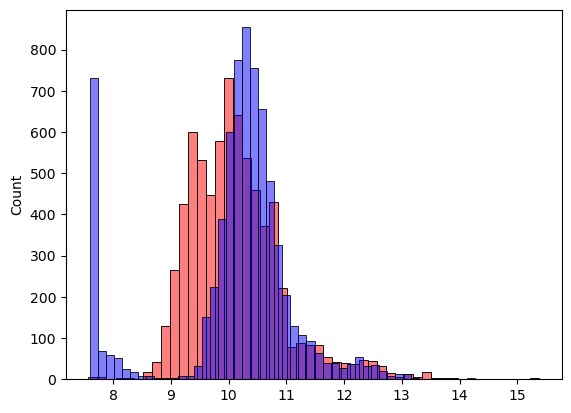

In [68]:
#alpha changes the transparency of the bars
#bins specifies the number of bars
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### Root Mean Square Error(RMSE)

In [69]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [70]:
rmse(y_train, y_pred)

0.7518504143673326

### Validating the model

In [72]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)


In [73]:
#mplement the prepare_X function. The idea here to provide the same way of preparing the dataset regardless of whether it’s train set, validation set, or test set.
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    #extracting the Numpy array
    X = df_num.values
    return X

In [74]:
#we can use this function when we prepare data for the training and for the validation as well.
#In the training part we only use training dataset to train the model.
#In the validation part we prepare the validation dataset the same way like before and apply the model. 
#Lastly we compute the rmse.

# Training part
X_train  = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Evaluation part
rmse(y_val, y_pred)


0.7483220833082832

<p>When we compare the RMSE from training with the value from validation (0.751 vs. 0.748) we see that the model performs similarly well on the seen and unseen data. That is what we have hoped for.</p>

### Categorical variables

<p><strong>Categorical variables</strong> are variables that are categories (typically strings)</p>
<p>Here: make, model, engine_fuel_type, transmission_type, driven_wheels, market_category, vehicle_size, vehicle_style But, there is one value that looks like numerical variable, but it isn’t.
number_of_doors is not really a numerical number.</p>

In [76]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [77]:
df_train.number_of_doors

0       4.0
1       4.0
2       4.0
3       2.0
4       4.0
       ... 
7145    4.0
7146    2.0
7147    4.0
7148    2.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [78]:
df_train.number_of_doors == 2

0       False
1       False
2       False
3        True
4       False
        ...  
7145    False
7146     True
7147    False
7148     True
7149    False
Name: number_of_doors, Length: 7150, dtype: bool

<p>Typical way of encoding such categorical variables is that we represent it with a bunch of binary columns – so called one-hot encoding. For each value we have a different column</p>

<p>We can imitate this encoding by turning the booleans from the last snippet into integers (1 and 0) and creating a new variable for each number of doors.</p>

In [79]:
df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int')
df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype('int')
df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype('int')

<p>But we can do this easier with string replacement.</p>

In [80]:
'num_doors_%s' % 4

 


'num_doors_4'

In [81]:
# With that replacement we can write a loop
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')
 
# We delete this because we'll use another solution
for v in [2, 3, 4]:
    del df_train['num_doors_%s' % v]

<p>Let’s use this string replacement method in our prepare_X function.</p>

In [82]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X
 
prepare_X(df_train)

array([[420.,   8.,  22., ...,   0.,   0.,   1.],
       [260.,   6.,  26., ...,   0.,   0.,   1.],
       [171.,   4.,  28., ...,   0.,   0.,   1.],
       ...,
       [305.,   6.,  26., ...,   0.,   0.,   1.],
       [205.,   4.,  31., ...,   1.,   0.,   0.],
       [120.,   4.,  23., ...,   0.,   0.,   1.]])

<p>When you look at the output of the last snippet you see at the end of each list there are three new items – one for each number of doors (2, 3, 4). Now we can check if the model performance has improved with the new features.

In [83]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

0.5189425210679331

<p>We see in contrast to the last training with rmse of 0.518925210679331 there is only a slightly improvement, almost negligible so the number of doors feature is not that useful. Maybe the ‘Make’ information is more useful.</p>

In [84]:
df.make.nunique()

48

<p>There are 48 unique values in the ‘Make’ column. That could be too much. Let’s look at the most popular ones.</p>

In [85]:
df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [86]:
# If we want to get the actual values, we use the index property
df.make.value_counts().head().index

Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object', name='make')

In [87]:
# Wrap it in a usual Python list
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

<p>We can now adapt again our prepare_X function to add the new feature.</p>

In [88]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
         
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

<p>Now we can use our new prepare_X function and train and validate again.</p>

In [89]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

0.5098859931532362

<p>The model performance has once again improved somewhat. How about adding all the other categorical variables now? This should improve the performance even more, right? Let’s try.</p>

In [90]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]
 
# The dictionary category will contain for each of the categories 
# the top 5 most common ones
categories = {}
 
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)
     
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

<p>The next snippet shows how to implement the new features to our prepare_X function. This time we need two loops as described inline.</p>

In [91]:
def prepare_X(df):
    # this is good way to do, otherwise while using df you'll modify the original data
    # what is mostly not wanted
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
 
    # First loop is for each key of the dictionary categories.
    # Second loop is for each value inside the categories
    # For each of this values we create a new column.
    for c, values in categories.items():    
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

<p>Now we can train the model again and apply it to the validation data to see what is the model performance.</p>

In [92]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

75.35397947733084

<p>This time the model performance is very bad. As you can see the RMSE (75.353) is very large. So something went wrong. In the next article we’ll see why that has happened and how to fix it.</p>

### Regularization

<p>The topic for this part is <strong>regularization</strong> as a way to solve the problem of duplicated columns in our data.</p>

In [93]:
# reg = regularized
# parameter r = short for regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [94]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

0.4580216014865772

### Tuning the model 

<p>The topic for this article is finding the best regularization parameter for our linear regression model. We realized that the parameter r affects the quality of our model and now we try to find the best value for this r.</p>

In [95]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0.0 bias term:  3577553087685303.0 rmse:  75.35397947733084
reg parameter:  1e-05 bias term:  5.295633344094753 rmse:  0.4580306415834912
reg parameter:  0.0001 bias term:  6.759580055341216 rmse:  0.45803058353096526
reg parameter:  0.001 bias term:  6.7507740140532935 rmse:  0.45802975663608725
reg parameter:  0.01 bias term:  6.737430767200124 rmse:  0.4580216014865772
reg parameter:  0.1 bias term:  6.615563506351078 rmse:  0.4579528227388946
reg parameter:  1 bias term:  5.874306163960158 rmse:  0.4580163670320614
reg parameter:  10 bias term:  4.239539589639644 rmse:  0.47325541869384075


<p>What you see here is using r=0 makes the bias term huge and the rmse score aswell.
0.001 could be a good parameter for r.</p>

In [96]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
score = rmse(y_val, y_pred)
    
print("rmse: ",score)

rmse:  0.45802975663608725


### Using the model

<p>What we want to do now is to train our final model on both training dataset and validation dataset. We call this FULL TRAIN. After that we make the final evaluation on the test dataset to make sure that our model works fine and check what is the value for RMSE. It shouldn’t be too different from what we saw on the validation dataset.</p>

### Combining datasets

<p>First step to do is getting our data. So we need to combine df_train and df_val into one dataset. We can use Pandas concat() function that takes a list of dataframes and concatenates them together</p>

In [97]:
df_full_train = pd.concat([df_train, df_val])

<p>We also need to concatenate y_train and y_val to get y_full_train. This time we use the concatenate function of NumPy library.</p>

In [98]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([11.40032771, 10.54799581,  9.93090815, ..., 10.84058041,
       10.25347519, 10.8441001 ])

### Resetting index

<p>Now we have again a coherent dataset for training and we can prepare it for the usage as we did before. The prepare_X() function still works fine.</p>

In [99]:
X_full_train = prepare_X(df_full_train) 
X_full_train

array([[420.,   8.,  22., ...,   0.,   0.,   0.],
       [260.,   6.,  26., ...,   0.,   0.,   0.],
       [171.,   4.,  28., ...,   0.,   0.,   0.],
       ...,
       [325.,   6.,  24., ...,   0.,   0.,   0.],
       [261.,   6.,  21., ...,   0.,   0.,   0.],
       [355.,   8.,  23., ...,   0.,   0.,   0.]])

### Train the final model

<p>Next step is to train the final model on the combined dataset. We’re using the new train_linear_regression_reg() function to get the value for w0 and the vector w.</p>

In [100]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0, w

(6.721880018034083,
 array([ 1.21861224e-03,  1.14971914e-01, -3.60562069e-02,  1.32143349e-02,
        -5.05293829e-05, -1.02578039e-01, -9.02203001e-01, -1.10526809e+00,
        -7.81758522e-01, -3.75295202e-02,  1.68179889e-01,  5.50547701e-03,
        -1.43955253e-01, -9.92926115e-02, -5.02052843e-01,  3.76650663e-02,
        -3.50080782e-01, -5.62112325e-01,  2.71709061e-03,  1.14632932e+00,
         9.75725830e-01,  1.20480695e+00,  2.94544446e+00,  4.46715767e-01,
         1.76561298e+00,  1.63049171e+00,  1.72340906e+00,  1.60163946e+00,
        -9.67346762e-02,  1.26604219e-02, -3.95437198e-02, -1.35518277e-02,
         2.67736764e-02,  2.31879874e+00,  2.21272274e+00,  2.18983896e+00,
         3.68067287e-02,  4.84988459e-02,  2.33399535e-01,  3.45922826e-01,
        -1.25471199e-01]))

### Applying model to test data


<p>Now is the great moment for the final model. It must pass the final test. For this purpose we use test data, which are again prepared with the prepare_X() function. Then the model is applied to the test data and the RMSE can be calculated.</p>

In [101]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
 
score = rmse(y_test, y_pred)
    
print("rmse: ",score)

rmse:  0.5075885552679636


<p>RMSE_test = 0.5075885552679636 is not so far away from RMSE_val = 0.4568807317131709. That means the model generalizes quite well and it didn’t get this score by chance. Now we have our final model and we can use it. The way we want to use it is to predict the price of an (unseen) car – unseen means here that the model hasn’t seen this car during training.</p>

### Using the model

<p>Using the model means:</p>
<ol>
    <li>Extracting all the features (getting feature vector of the car)</li>
    <li>Applying our final model to this feature vector & predicting the price</li>
</ol>

#### Feature Extraction

<p>For this step we can take any car from our test dataset and pretend it’s a new car. Let’s just take one car.</p>

In [102]:
df_test.iloc[20]

make                                      gmc
model                                  savana
year                                     2014
engine_fuel_type     flex-fuel_(unleaded/e85)
engine_hp                               310.0
engine_cylinders                          8.0
transmission_type                   automatic
driven_wheels                 all_wheel_drive
number_of_doors                           3.0
market_category                     flex_fuel
vehicle_size                          midsize
vehicle_style                   passenger_van
highway_mpg                                17
city_mpg                                   13
popularity                                549
Name: 20, dtype: object

<p>Usually the way we do it is that we don’t get a dataframe here. But it could be a Python dictionary with all the information about the car. In real life you can imagine a website or an app, where people enter all the values. Then the website sends the request with all the information (as dictionary) to the model. The model replies back with the predicted price.</p>

<p>For this example we turn this data of our car into a dictionary.</p>

In [103]:
car = df_test.iloc[20].to_dict()
car

{'make': 'gmc',
 'model': 'savana',
 'year': 2014,
 'engine_fuel_type': 'flex-fuel_(unleaded/e85)',
 'engine_hp': 310.0,
 'engine_cylinders': 8.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 3.0,
 'market_category': 'flex_fuel',
 'vehicle_size': 'midsize',
 'vehicle_style': 'passenger_van',
 'highway_mpg': 17,
 'city_mpg': 13,
 'popularity': 549}

<p>The car is our request and now remember the prepare_X function expects a dataframe, so we need to create a dataframe with a single row for our request.</p>

In [104]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,gmc,savana,2014,flex-fuel_(unleaded/e85),310.0,8.0,automatic,all_wheel_drive,3.0,flex_fuel,midsize,passenger_van,17,13,549


<p>We can use this single row DataFrame as input for the prepare_X() function to get the feature matrix. In this case our feature matrix is a feature vector.</p>

In [105]:
X_small = prepare_X(df_small)
X_small

array([[310.,   8.,  17.,  13., 549.,   3.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]])

#### Predicting the price

<p>The final step is to apply the final model to our requested car (feature vector) and predict the price.</p>

In [106]:
y_pred = w0 + X_small.dot(w)
# Don't need an array but it's first (and only) item
y_pred = y_pred[0]
y_pred

10.670522336219976

<p>10.67 is still not the price in $. To get the real price we need to undo the logarithm.</p>

In [107]:
np.expm1(y_pred)

43066.431303061945

<p>After undoing the logarithm we get the price in dollars.So we think that a car with these charachteristics should cost 43066.43 dollars</p>

<p>Lastly to get an evaluation about model performance let’s compare the predicted price to the actual price of this requested car.</p>

In [108]:
np.expm1(y_test[20])

34524.99999999998